__Import necessary libraries__

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle

__Load the Dataset__

In [22]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


__Check__ (NULL & DUBLICATES)

In [39]:
print(df.isnull().sum())
df.duplicated().sum().any()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


False

__Remove__ ('Id' Column)

In [4]:
df = df.drop(columns= ['Id'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


__Statistics Summary__

In [5]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


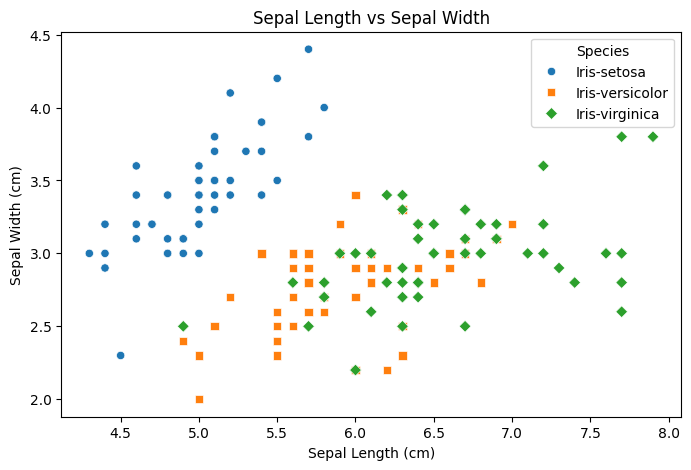

In [6]:
# Vislualizing the sepal length&Width
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='SepalLengthCm', y='SepalWidthCm', hue='Species', style='Species', markers=["o", "s", "D"])
plt.title('Sepal Length vs Sepal Width')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend(title='Species')
plt.show()

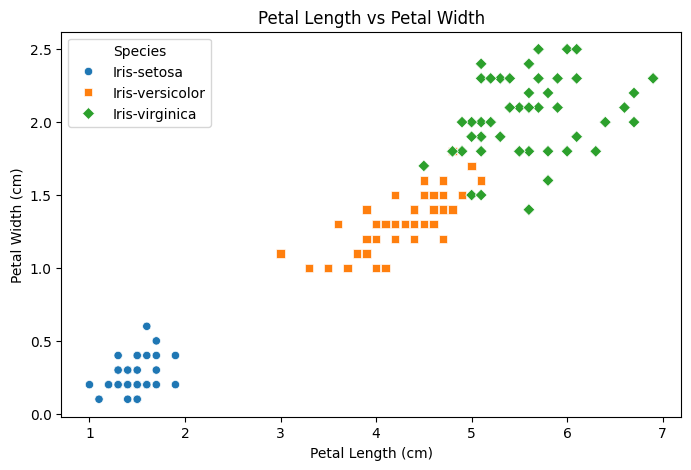

In [7]:
# Vislualizing the petal length&Width
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='PetalLengthCm', y='PetalWidthCm', hue='Species', style='Species', markers=["o", "s", "D"])
plt.title('Petal Length vs Petal Width')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend(title='Species')
plt.show()

__Correlation Matrix__

In [8]:
numerical_features = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numerical_features.corr()

print(correlation_matrix)

               SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
SepalLengthCm       1.000000     -0.109369       0.871754      0.817954
SepalWidthCm       -0.109369      1.000000      -0.420516     -0.356544
PetalLengthCm       0.871754     -0.420516       1.000000      0.962757
PetalWidthCm        0.817954     -0.356544       0.962757      1.000000


__Heatmap__ (Visualize)

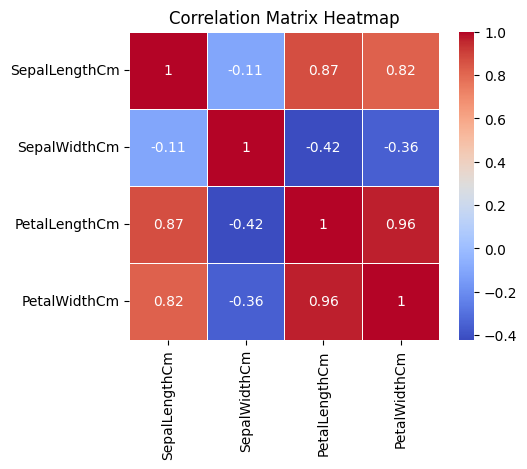

In [9]:
plt.figure(figsize=(5, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

__Label Encoder__

In [10]:
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])

__Features & Labels__

In [11]:
X = df.drop(columns=['Species'])
y = df['Species']

__Data Splitting__ (Training & Testing Sets)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30) # test 30% & train 70%

__Features Scaling__

In [13]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

__Define Models__

In [14]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=500, C=1.0),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(probability=True),
    'Naive Bayes': GaussianNB()
}

__Dictionary__ (For Accuracy of each Model)

In [15]:
accuracy_scores = {}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores[name] = accuracy
    print(f'\n{name}  Accuracy: {accuracy * 100:.2f}%')
    print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
    print('Classification Report:\n', classification_report(y_test, y_pred))
    print('-' * 60)


Logistic Regression  Accuracy: 97.78%
Confusion Matrix:
 [[16  0  0]
 [ 0  9  1]
 [ 0  0 19]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.90      0.95        10
           2       0.95      1.00      0.97        19

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45

------------------------------------------------------------

Decision Tree  Accuracy: 97.78%
Confusion Matrix:
 [[16  0  0]
 [ 0  9  1]
 [ 0  0 19]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.90      0.95        10
           2       0.95      1.00      0.97        19

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45


__Best Model__ (Based on Accuracy)

In [16]:
accuracy_scores

{'Logistic Regression': 0.9777777777777777,
 'Decision Tree': 0.9777777777777777,
 'Random Forest': 0.9777777777777777,
 'SVM': 0.9777777777777777,
 'Naive Bayes': 0.9777777777777777}

In [17]:
best_model_name = max(accuracy_scores, key=accuracy_scores.get)
best_model_object = models[best_model_name]
best_accuracy = accuracy_scores[best_model_name]
print(f"\nThe best performing model is '{best_model_name}' : {best_accuracy*100:.2f}%.")


The best performing model is 'Logistic Regression' : 97.78%.


__Save__ (Best Model)

In [18]:
with open('iris_best_model.pkl', 'wb') as file:
    pickle.dump(best_model_object, file)
    print(f"{best_model_name} saved successfully as 'iris_best_model.pkl'.")

Logistic Regression saved successfully as 'iris_best_model.pkl'.


__Save__ (label Encoder & Scalar)

In [19]:
label_encoder_path =	'label_encoder.pkl'
with open (label_encoder_path, 'wb') as file:
    pickle.dump(le, file)
    
scaler_path = 'scaler.pkl'
with open(scaler_path, 'wb') as file:
    pickle.dump(scaler, file)